# 1.0 Hypothesis Testing: Fundamentals

## 1.1 Significance Testing

### 1.1.1 Hypothesis Testing

In this section, we'll learn about **hypothesis testing** and **statistical significance**. A hypothesis is a pattern or rule about a process in the world that can be tested. **We use hypothesis testing to determine if a change we made had a meaningful impact or not**.

- You can use hypothesis testing to help you determine:
  - if a new banner ad on a website caused a meaningful drop in the user engagement,
  - if raising the price of a product caused a meaningful drop in sales,
  - if a new weight loss pill helped people lose more weight.

Observing a decrease in user engagement or sales after instituting a change doesn't automatically imply that the change was the cause. **Hypothesis testing allows us to calculate the probability that random chance was actually responsible for the difference in outcome**. Every process has some inherent amount of randomness that we can't measure and understanding the role of chance helps us reach a conclusion that's more likely to be correct.

We first set up a **null hypothesis** that describes the status quo. We then state an **alternative hypothesis**, which we used to compare with the **null hypothesis** to decide which describes the data better. In the end, we either need to:

- reject the null hypothesis and accept the alternative hypothesis or
- accept the null hypothesis and reject the alternative hypothesis.

We can frame each of the studies above as these rival pairs of hypotheses:

- if a new banner ad on a website caused a meaningful drop in the user engagement:
  - **null hypothesis**: users who were exposed to the banner ad spent the same amount of time on the website than those who weren't.
  - **alternative hypothesis**: users who were exposed to the banner ad spent less time on the website than those who weren't.
- if raising the price of a product caused a meaningful drop in sales:
  - **null hypothesis**: the number of purchases of the product was the same at the lower price than it was at the higher price.
  - **alternative hypothesis**: the number of purchases of the product was lower at the higher price than it was at the lower price.
- if a new weight loss pill helped people lose more weight:
  - **null hypothesis**: patients who went on the weight loss pill lost no more weight than those who didn't.
  - **alternative hypothesis**: patients who went on the weight loss pill lost more weight than those who didn't.

In the rest of *Section Significance Testing*, we'll focus on the third scenario and use data to determine if a weight loss pill helped people lose weight.



### 1.1.2 Research design

To help us determine if the weight loss pill was effective, we conducted a study where we invited 100 volunteers and split them into 2 even groups randomly:

  - Group A was given a placebo, or fake, pill and instructed to consume it on a daily basis.
  - Group B was given the actual weight loss pill and instructed to consume it on a daily basis.

Both groups were instructed to change nothing else about their diets. Group A is referred to as the **control group** while group B is referred to as the **treatment group**. This type of study is called a [blind experiment](https://en.wikipedia.org/wiki/Blinded_experiment) since the participants didn't know which pill they were receiving. This helps us reduce the potential bias that is introduced when participants know which pill they were given. For example, participants who are aware they were given the weight loss pill may try to add healthier foods to their diet to help them lose more weight. Both groups were weighed before the study began and a month later, after the study ended.

Understanding the **research design** for a study is an important first step that informs the rest of your analysis. It helps us uncover potential flaws in the study that we need to keep in mind as we dive deeper. The weight loss pill study we conducted is known as an experimental study. Experimental studies usually involve bringing in participants, instructing them to perform some tasks, and observing them. A key part of running an experimental study is random assignment, which involves assigning participants in the study to random groups without revealing which group each participant is in. Before exploring and analyzing a dataset, it's important to understand how the study was conducted. Flaws in how the study was run can lead you to reach the wrong conclusions.

### 1.1.3 Statistical significance

Statistics helps us determine if the difference in the weight lost between the 2 groups (A and B) is because of random chance or because of an actual difference in the outcomes. If there is a meaningful difference, we say that the results are **statistically significant**. We'll dive into what this means exactly over the course of this section.

Now that we're familiar with the study, let's state our null and alternative hypotheses more precisely. **Our null hypothesis should describe the default position of skepticism**, which is that there's no statistically significant difference between the outcomes of the 2 groups. Put another way, it should state that any difference is due to random chance. **Our alternative hypothesis should state that there is in fact a statistically significant difference between the outcomes of the 2 groups**.

- **Null hypothesis**: participants who consumed the weight loss pills lost the same amount of weight as those who didn't take the pill.
- **Alternative hypothesis**: participants who consumed the weight loss pills lost more weight than those who didn't take the pill.


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# import the dataset
data = pd.read_csv("weight_loss.csv",names=["A","B"])

# weight mean for group A and B
mean_group_a = data.A.mean()
mean_group_b = data.B.mean()

# print the results
print(mean_group_a,mean_group_b)

In [0]:
data.shape

(50, 2)

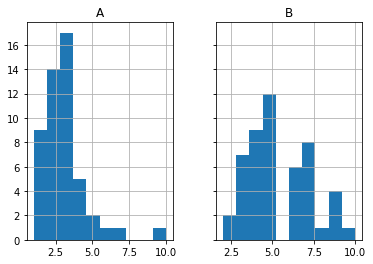

In [0]:
data.hist(sharey=True)
plt.show()

### 1.3.4 Test statistic

To decide which hypothesis more accurately describes the data, we need to frame the hypotheses more quantitatively. The first step is to decide on a **test statistic**, which is a numerical value that summarizes the data and we can use in statistical formulas. We use this test statistic to run a statistical test that will determine how likely the difference between the groups were due to random chance.

Since we want to know if the amount of weight lost between the groups is meaningfully different, we will use the difference in the means, also known as the mean difference, of the amount of weight lost for each group as the test statistic.

The following symbol is used to represent the sample mean in statistics:

$$
\bar{x}
$$

We will use:

$$
\bar{x}_a
$$

to denote the mean of group A and

$$
\bar{x}_b
$$

to denote the mean of group B. For the mean difference, we'll subtract the mean of group A from group B:

$$
\bar{x}_b - \bar{x}_a
$$

Now that we have decided on a test statistic, we can rewrite our hypotheses to be more precise:

- Null hypothesis: $\bar{x}_b - \bar{x}_a = 0$
- Alternative hypothesis: $\bar{x}_b - \bar{x}_a > 0$

Note that while we've stated our hypotheses as equations, we're not simply calculating the difference and matching the result to hypothesis. We're instead using a statistical test to determine which of these statements better describes the data.

In [0]:
mean_group_b - mean_group_a

2.52

$$
\bar{x}_b - \bar{x}_a = 2.52
$$

### 1.1.5 Permutation test

Now that we have a test statistic, we need to decide on a statistical test. **The purpose of a statistical test is to work out the likelihood that the result we achieved was due to random chance**.

The **permutation test** is a statistical test that involves simulating rerunning the study many times and recalculating the test statistic for each iteration. The goal is to calculate a distribution of the test statistics over these many iterations. This distribution is called the **sampling distribution** and it approximates the full range of possible test statistics under the null hypothesis. We can then benchmark the test statistic we observed in the data (a mean difference of 2.52) to determine how likely it is to observe this mean difference under the null hypothesis. If the null hypothesis is true, that the weight loss pill doesn't help people lose more weight, than the observed mean difference of 2.52 should be quite common in the sampling distribution. If it's instead extremely rare, then we accept the alternative hypothesis instead.

To simulate rerunning the study, we randomly reassign each data point (weight lost) to either group A or group B. We keep track of the recalculated test statistics as a separate list. By re-randomizing the groups that the weight loss values belong to, we're simulating what randomly generated groupings of these weight loss values would look like. We then use these randomly generated groupings to understand how rare the groupings in our actual data were.

Ideally, the number of times we re-randomize the groups that each data point belongs to matches the total number of possible permutations. Usually, the number of total permutations is too high for even powerful supercomputers to calculate within a reasonable time frame. While we'll use 1000 iterations for now since we'll get the results back quickly, in later we'll learn how to quantify the tradeoff we make between accuracy and speed to determine the optimal number of iterations.

Since we'll be randomizing the groups each value belongs to, we created a list named **all_values** that contains just the weight loss values.

In [0]:
import numpy as np
# concatenate A and B in a vector
df = pd.concat([data.A,data.B],axis=0,ignore_index=True)
# shuffle all values
all_values= df.reindex(np.random.permutation(df.index)).values
all_values

array([ 5,  3,  2,  5,  3,  7,  2,  4,  7,  5,  2,  3,  8,  4,  2,  1,  1,
        5,  5,  6,  2,  2,  2,  2,  2,  3,  7,  9,  4,  3,  3, 10,  2,  3,
        3,  4,  4,  5,  4,  5,  5,  9,  9,  7,  5,  2,  3,  3,  2,  3,  3,
        7,  2,  7,  6,  1,  7,  3,  5,  6,  1,  3,  5,  3,  3,  1,  4,  9,
        2,  1,  2,  6,  4,  4,  3,  3,  4, 10,  4,  7,  6,  1,  3,  6,  3,
        6,  3,  7,  5,  1,  3,  5,  3,  1,  4,  2,  4,  4,  3,  5])

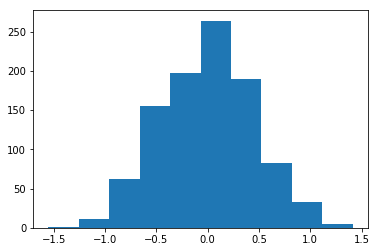

In [0]:
mean_difference = 2.52
mean_differences = []
for i in range(1000):
    group_a = []
    group_b = []
    for value in all_values:
        assignment_chance = np.random.rand()
        if assignment_chance >= 0.5:
            group_a.append(value)
        else:
            group_b.append(value)
    iteration_mean_difference = np.mean(group_b) - np.mean(group_a)
    mean_differences.append(iteration_mean_difference)
   
plt.hist(mean_differences)
plt.show()

### 1.1.6 Sampling distribution

By randomly assigning participants to group A or group B, we account for the effect of random chance. Someone in group B who just happened to lose more weight (but not because of the pills) makes the results look better than they were. By creating many permutations, we're able to see all possible configurations of this error. Creating a histogram enables us to see how likely different values of our test statistic are if we repeated our experiment many times.

The histogram we generated in the previous step using Matplotlib is a visual representation of the sampling distribution. Let's now create a dictionary that contains the values in the sampling distribution so we can benchmark our observed test statistic against it.

The keys in the dictionary should be the test statistic and the values should be their frequency:

```python
{
    0.34943639291465356: 3,
    -0.55702280912364888: 2, 
    -0.14942528735632177: 1
    ....
}
```

We need to first count up how frequently each value in the list, **mean_differences**, occurs. As we loop over **mean_differences**, we need a way to check if the test statistic is already in our dictionary:

- If it is, we look up the value at that key, add 1 to it, and assign the new value to the key.
- If it isn't, we add the key to the dictionary and assign the value 1 to it.

In [0]:
sampling_distribution = {}
for diff in mean_differences:
    if sampling_distribution.get(diff, False):
        sampling_distribution[diff] = sampling_distribution[diff] + 1
    else:
        sampling_distribution[diff] = 1

In [0]:
sorted(sampling_distribution.items(), key=lambda kv: kv[1],reverse=True)[:10]

[(0.036814725890355504, 8),
 (-0.16000000000000014, 7),
 (-0.3709353673223603, 6),
 (-0.4471153846153846, 6),
 (-0.046474358974359475, 6),
 (0.17021276595744705, 6),
 (0.16326530612244916, 6),
 (0.08992372541148086, 5),
 (0.18840579710144967, 5),
 (-0.0305098354074671, 5)]

### 1.1.7 P value

In the sampling distribution we generated, most of the values are closely centered around the mean difference of 0. This means that if it were purely up to chance, both groups would have lost the same amount of weight (the null hypothesis). But since the observed test statistic is not near 0, it could mean that the weight loss pills could be responsible for the mean difference in the study.

We can now use the sampling distribution to determine the number of times a value of 2.52 or higher appeared in our simulations. If we then divide that frequency by 1000, we'll have the probability of observing a mean difference of 2.52 or higher purely due to random chance.

This probability is called the **p value**. If this **value is high, it means that the difference in the amount of weight both groups lost could have easily happened randomly and the weight loss pills probably didn't play a role**. On the other hand, a low p value implies that there's an incredibly small probability that the mean difference we observed was because of random chance.

In [0]:
frequencies = []
for sp in sampling_distribution.keys():
    if sp >= 2.52:
        frequencies.append(sampling_distribution[sp])
p_value = np.sum(frequencies) / 1000
p_value

0.0

In general, it's good practice to set the **p value** threshold before conducting the study:

- if the **p value** is less than the threshold, we:
  - **reject the null hypothesis** that there's no difference in mean amount of weight lost by participants in both groups,
  - **accept the alternative hypothesis** that the people who consumed the weight loss pill lost more weight,
  - conclude that the weight loss pill does affect the amount of weight people lost.
- if the **p value** is greater than the threshold, we:
  - **accept the null hypothesis** that there's no difference in the mean amount of weight lost by participants in both groups,
  - **reject the alternative hypothesis** that the people who consumed the weight loss pill lost more weight,
  - conclude that the weight loss pill doesn't seem to be effective in helping people lose more weight.

The most common **p value** threshold is 0.05 or 5%, which is what we'll use in this section. Although .05 is an arbitrary threshold, it means that there's only a 5% chance that the results are due to random chance, which most researchers are comfortable with.

## 1.2 Chi-Squared Test

### 1.2.1 Observed and expected frequencies

In this section, we'll be learning about the **chi-squared test** for categorical data. This test enables us to determine the **statistical significance** of observing a set of categorical values.

We'll be working with data on US income and demographics throughout this section. 

We'll be looking at individual income in the United States. The data is from the 1994 census, and contains information on an individual's marital status, age, type of work, and more. You can download the data from the [University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Adult).


In [0]:
import pandas as pd

income = pd.read_csv("income.csv")
income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


The entire dataset has 32561 rows, and is a sample of the full Census. Of the rows, 10771 are Female, and 21790 are Male. These numbers look a bit off, because the full Census shows that the US is about 50% Male and 50% Female. So our expected values for number of Males and Females would be 16280.50 each.

|          | Male    | Female  | Total |
|----------|---------|---------|-------|
| Observed | 21790   | 10771   | 32561 |
| Expected | 16280.50 | 16280.50 | 32561 |

In [0]:
print("Number of rows: %d" % (income.shape[0]))
print("observed #female: %d\nobserved #male: %d" % (income.sex.value_counts()[1], income.sex.value_counts()[0]))
print("expected #female: %.2f\nexpected #male: %.2f" % (income.shape[0]*0.5, income.shape[0]*0.5))

Number of rows: 32561
observed #female: 10771
observed #male: 21790
expected #female: 16280.50
expected #male: 16280.50


We know that something looks off, but we don't quite know how to quantify how different the observed and expected values are. We also don't have any way to determine if there's a statistically significant difference between the two groups, and if we need to investigate further.

This is where a chi-squared test can help. **The chi-squared test enables us to quantify the difference between sets of observed and expected categorical values**.

### 1.2.2. Chi-Square Value

We can calculate , the chi-squared value, by adding up all of the squared differences between observed and expected values.

$$
\chi^2 = \sum_{i=1}^{k} \frac{(observed-expected)^2}{expected}
$$

where $k$ is the number of classes the variable under study (in this case, $k=2$, male and female).

In [0]:
female_diff = (income.sex.value_counts()[1] - income.shape[0]* 0.5)**2/(income.shape[0]*0.5)
male_diff = (income.sex.value_counts()[0] - income.shape[0]* 0.5)**2/(income.shape[0]*0.5)
chi2_census = female_diff + male_diff
chi2_census

3728.950615767329

Now that we have a **chi-squared value** for our observed and expected gender counts, **we need a way to figure out what the chi-squared value represents.** We can translate a chi-squared value into a statistical significance value using a chi-squared sampling distribution. If you recall, we covered statistical significance and p-values in the last section. **A p-value allows us to determine whether the difference between two values is due to chance, or due to an underlying difference.**

We can generate a chi-squared sampling distribution using our expected probabilities. If we repeatedly generate random samples that contain 32561 samples, and graph the chi-squared value of each sample, we'll be able to generate a distribution. Here's a rough algorithm:

- Randomly generate 32561 numbers that range from 0-1.
- Based on the expected probabilities, assign Male or Female to each number.
- Compute the observed frequences of Male and Female.
- Compute the chi-squared value and save it.
- Repeat several times.
- Create a histogram of all the chi-squared values.

By comparing our chi-squared value to the distribution, and seeing what percentage of the distribution is greater than our value, we'll get a p-value.

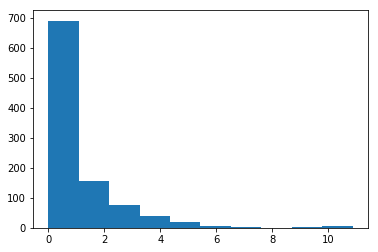

In [0]:
from numpy.random import random
import matplotlib.pyplot as plt

chi_squared_values = []

for i in range(1000):
    sequence = random((32561,))
    sequence[sequence < .5] = 0
    sequence[sequence >= .5] = 1
    male_count = len(sequence[sequence == 0])
    female_count = len(sequence[sequence == 1])
    male_diff = (male_count - 16280.5) ** 2 / 16280.5
    female_diff = (female_count - 16280.5) ** 2 / 16280.5
    chi_squared = male_diff + female_diff
    chi_squared_values.append(chi_squared)

plt.hist(chi_squared_values)
plt.show()

Now that we have a chi-squared sampling distribution, we can compare the chi-squared value we calculated for our data to it to see if our result is statistically significant. The chi-squared value we calculated was 3728.95. The highest value in the chi-squared sampling distribution was about 12. This means that our chi-squared value is higher than 100% of all the values in the sampling distribution, so we get a p-value of 0. This means that there is a 0% chance that we could get such a result randomly. You may recall from the last section that .05 is the typical threshold for statistical significance, and anything below it is considered significant.

**This would indicate that we need to investigate our data collection techniques more closely to figure out why such a result occurred.**

The [scipy.stats.chisquare](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.chisquare.html) function takes in an array of observed frequences, and an array of expected frequencies, and returns a tuple containing both the chi-squared value and the matching p-value that we can use to check for statistical significance.

In [0]:
import numpy as np
from scipy.stats import chisquare

observed = np.array([21790, 10771])
expected = np.array([16280.50,16280.50])
chisquare_value, pvalue = chisquare(observed, expected)

In [0]:
chisquare_value

3728.950615767329

In [0]:
pvalue

0.0

### 1.2.3 Degrees of freedom

When we were computing the chi-squared value earlier, we were working with 2 values that could vary, the number of Males and the number of Females. But actually, only 1 of the values could vary. Since we already know the total number of values, 32561, if we set one of the values, the other has to be the difference between 32561 and the value we set.

The table from earlier might clarify this:


|          | Male    | Female  | Total |
|----------|---------|---------|-------|
| Observed | 21790   | 10771   | 32561 |
| Expected | 16280.50 | 16280.50 | 32561 |

If we set a count for Male or Female, we know what the other value has to be, because they both need to add up to 32561.

A **degree of freedom** is the number of values that can vary without the other values being "locked in". In the case of our two categories, there is actually only one degree of freedom. Degrees of freedom are an important statistical concept that will come up repeatedly, both in this section and after.


So far, we've only calculated chi-squared values for 2 categories and 1 degree of freedom. We can actually work with any number of categories, and any number of degrees of freedom. We can accomplish this using largely the same formula we've been using, but we will need to generate new sampling distributions for each number of degrees of freedom.

If we look at the race column of the income data, the possible values are:


In [0]:
# five degree of freedom
income.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

We can get our expected proportions straight from the full 1994 US Census:

- White -- 80.3%
- Black -- 12.1%
- Asian-Pac-Islander -- 2.9%
- Amer-Indian-Eskimo -- .8%
- Other -- 3.9%

Here's a table showing expected and actual values for our income dataset:

|          | White   | Black  | Asian | Amer. Indian | Other  | Total |
|----------|---------|--------|-------|--------------|--------|-------|
| Observed | 27816   | 3124   | 1039  | 311          | 271    | 32561 |
| Expected | 26146.5 | 3939.9 | 944.3 | 260.5        | 1269.8 | 32561 |

It looks like there's a discrepancy between the **White** and **Other** counts, but let's dig in a bit more and calculate the chi-squared value.

In [0]:
observed = np.array([27816, 3124, 1039, 311, 271])
expected = np.array([26146.5, 3939.9, 944.3, 260.5, 1269.8])

chisquare_value, race_pvalue = chisquare(observed, expected)

In [0]:
chisquare_value

1080.485936593381

In [0]:
race_pvalue

1.2848494674873035e-232

### 1.2.4 Multiple categories

In the last section, we calculated a chi-squared value indicating how the observed frequencies in a single categorical column, such as **sex**, varied from the US population as a whole.

In this section, we'll look how to make this same technique applicable to **cross tables**, that show **how two categorical columns interact**. For instance, here's a table showing the relationship between **sex** and **high_income**:

In [0]:
cross = pd.crosstab(income["sex"], [income["high_income"]],margins=True)
cross

high_income,<=50K,>50K,All
sex,,,
Female,9592,1179,10771
Male,15128,6662,21790
All,24720,7841,32561


On looking at this diagram, you might see a pattern between **sex** and **high_income**. But it's hard to immediately quantify that pattern, and tell if it's significant. We can apply the [chi-squared test](https://en.wikipedia.org/wiki/Chi-squared_test) (also known as the chi-squared test of association) to figure out if there's a statistically significant correlation between two categorical columns.



### 1.2.5 Calculating expected values and statistical significance with muiltiple categories

In the single category chi-squared test, we find expected values from other data sets, and then compare with our own observed values. In a multiple category chi-squared test, we calculate expected values across our whole dataset. We'll illustrate this by converting our chart from last screen into proportions:

In [0]:
pd.crosstab(income["sex"], [income["high_income"]],margins=True,normalize=True).round(3)

high_income,<=50K,>50K,All
sex,,,
Female,0.295,0.036,0.331
Male,0.465,0.205,0.669
All,0.759,0.241,1.000


Each cell represents the proportion of people in the data set that fall into the specified categories.

- 20.5% of Males in the whole data set earn >50k in income.
- 33% of the whole dataset is Female
- 75.9% of the whole dataset earns <=50k.

We can use our total proportions to calculate expected values. 24.1% of all people in income earn >50k, and 33% of all people in income are Female, so we'd expect the proportion of people who are female and earn >50k to be 0.241 * 0.33, which is 0.07953. We have this expectation based on the proportions of Females and >50k earners across the whole dataset. Instead, we see that the observed proportion is 0.036, which indicates that there may be some correlation between the sex and high_income columns.

We can convert our expected proportion to an expected value by multiplying by 32561, the total number of rows in the data set, which gives us 32561 * 0.07953, or 2589.6.

In [0]:
# expected values for each 4 values in table above
males_over50k = .669 * .241 * 32561
males_under50k = .669 * .759 * 32561
females_over50k = .331 * .241 * 32561
females_under50k = .331 * .759 * 32561

print("Total: %d" % (males_over50k + males_under50k + females_over50k + females_under50k))
print("Females <=50k: %.2f" % females_under50k)
print("Females >50k: %.2f" % females_over50k)
print("Males <=50k: %.2f" % males_under50k)
print("Males >50k: %.2f" % males_over50k)


Total: 32561
Females <=50k: 8180.27
Females >50k: 2597.42
Males <=50k: 16533.53
Males >50k: 5249.78


In [0]:
observed = np.array([9592, 1179, 15128,	6662])
expected = np.array([8180.27, 2597.42, 16533.53, 5249.78])

chisq_value, pvalue_gender_income = chisquare(observed, expected)

In [0]:
chisq_value

1517.595316564686

In [0]:
pvalue_gender_income

0.0

Always there is pythonic way to solve our problems :-)

We can use the scipy.stats.chi2_contingency function to generate the expected values. The function takes in a cross table of observed counts, and returns the **chi-squared value**, the **p-value**, the **degrees of freedom**, and the **expected frequencies**.

In [0]:
from scipy.stats import chi2_contingency

chisq_value, pvalue_gender_race, df, expected = chi2_contingency(pd.crosstab(income["sex"], 
                                                                             [income["high_income"]]))

In [0]:
chisq_value

1517.813409134445

In [0]:
pvalue_gender_race

0.0

In [0]:
df

1

In [0]:
expected

array([[ 8177.24025675,  2593.75974325],
       [16542.75974325,  5247.24025675]])

# 2.0 Feature Selection For Machine Learning

The data features that you use to train your machine learning models have a huge infuence on the performance you can achieve. Irrelevant or partially relevant features can negatively impact model performance. In this section you will discover automatic feature selection techniques that you can use to prepare your machine learning data in Python with scikit-learn.

## 2.1 Feature Selection




Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested. Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like **linear and logistic regression**. Three benets of performing feature selection
before modeling your data are:

- **Reduces Overfitting**: Less redundant data means less opportunity to make decisions based on noise.
- **Improves Accuracy**: Less misleading data means modeling accuracy improves.
- **Reduces Training Time**: Less data means that algorithms train faster.

You can learn more about Feature Seleciton in the Scikit-Learn documentation [here](https://scikit-learn.org/stable/modules/feature_selection.html).

## 2.2 Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable. The scikit-learn library provides the [SelectKBest class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) that can be used with a suite of diferent statistical tests to select a specific number of features. The example below uses the chi-squared (chi2) statistical test for non-negative features to select 5 of the best
features from 1994 US Census dataset.

In [0]:
import pandas as pd
# load dataset
income = pd.read_csv("income.csv")
#income.head()

In [0]:
# using scipy implementation for chi-square test

# all chi-squared values
chi_dict = {}
# only categorical columns are used in chi-squared test
columns = income.select_dtypes("object").columns.to_list()[:-1]

# eliminate the high_income column 
for name in columns:
  chisq_value, pvalue_all, df, expected = chi2_contingency(pd.crosstab(income[name],[income["high_income"]]))
  chi_dict[name] = (chisq_value, pvalue_all)

sorted(chi_dict.items(), key=lambda kv: kv[1][0],reverse=True)

[('relationship', (6699.07689685885, 0.0)),
 ('marital_status', (6517.741653663022, 0.0)),
 ('education', (4429.653302288619, 0.0)),
 ('occupation', (4031.974280247181, 0.0)),
 ('sex', (1517.813409134445, 0.0)),
 ('workclass', (1045.7085997281692, 2.026505431120716e-220)),
 ('race', (330.9204310085741, 2.305960610160958e-70)),
 ('native_country', (317.2303857833171, 2.2113858852543023e-44))]

In [0]:
# using sklearn implementation for chi-square test
from sklearn.feature_selection import chi2

# chi-squared values
chi_dict_2 = {}

# convert categorical to int
for name in income.select_dtypes("object").columns.to_list():
    col = pd.Categorical(income[name])
    income[name] = col.codes

# chi2 using sklearn
chisq_value, pvalue_all = chi2(income[columns],income["high_income"])

for name, chivalue, pvalue in zip (columns,chisq_value,pvalue_all):
  chi_dict_2[name] = (chivalue, pvalue)

sorted(chi_dict_2.items(), key=lambda kv: kv[1][0],reverse=True)

[('relationship', (3659.1431248616914, 0.0)),
 ('marital_status', (1123.4698179823927, 2.617594566541877e-246)),
 ('occupation', (504.55885380328937, 9.684219565036274e-112)),
 ('sex', (502.43941948212955, 2.8002990329980756e-111)),
 ('education', (297.94227040853315, 9.2488216478508e-67)),
 ('workclass', (47.508119161951804, 5.47766026182946e-12)),
 ('race', (33.03130514462992, 9.068685548081664e-09)),
 ('native_country', (13.619256016699909, 0.00022387738574547412))]

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature selection
fsel_model = SelectKBest(score_func=chi2, k=5)
new_income = fsel_model.fit_transform(income.drop(labels=["high_income"],axis=1),
                                      income.high_income)

# only k=5 columns
new_income

array([[    39,  77516,   2174,      0,     40],
       [    50,  83311,      0,      0,     13],
       [    38, 215646,      0,      0,     40],
       ...,
       [    58, 151910,      0,      0,     40],
       [    22, 201490,      0,      0,     20],
       [    52, 287927,  15024,      0,     40]])

In [0]:
# columns that were selected - univariate selection
income.loc[:,fsel_model.get_support()].columns

Index(['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week'], dtype='object')

## 2.3 Recursive Feature Elimination

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.
You can learn more about the RFE class3 in the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE). The example below uses RFE with the logistic regression algorithm to select the top 3 features. The choice of algorithm does not matter too much as long as it is skillful and consistent.

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# load dataset
income = pd.read_csv("income.csv")

# convert categorical to int
for name in income.select_dtypes("object").columns.to_list():
    col = pd.Categorical(income[name])
    income[name] = col.codes

# feature selection
model = LogisticRegression(solver="liblinear")
fsel = RFE(model,5)
new_income = fsel.fit_transform(income.drop(labels=["high_income"],axis=1),
                                income.high_income)

income.loc[:,fsel.support_].columns

Index(['education_num', 'marital_status', 'relationship', 'race', 'sex'], dtype='object')

## 2.4 Feature Selection and Pipelines

### 2.4.1 Load Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pydotplus
from IPython.display import Image
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
import pickle
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

### 2.4.2 Get Data

In [2]:
# income.csv has not missing values
income = pd.read_csv("income.csv")
income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
high_income       32561 non-null int8
dtypes: int64(6), int8(1), object(8)
memory usage: 3.5+ MB


### 2.4.3 Clean, prepare and manipulate Data (feature engineering)

This dataset contains a mix of **categorical (9 columns)** and **numerical (6 columns)** independent variables which as we know will need to pre-processed in different ways and separately.

This means that initially they’ll have to go through **separate pipelines** to be pre-processed appropriately and then we’ll combine them together. So the first step in both pipelines would have to be to extract the appropriate columns that need to be pushed down for pre-processing.

In [0]:
# the only step necessary to be done outside of pipeline
# convert the target column to categorical
col = pd.Categorical(income.high_income)
income["high_income"] = col.codes

In [0]:
#Custom Transformer that extracts columns passed as argument to its constructor 
class FeatureSelector( BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__( self, feature_names ):
        self.feature_names = feature_names 
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    #Method that describes what we need this transformer to do
    def transform( self, X, y = None ):
        return X[ self.feature_names ] 

#### 2.4.3.1 Categorical Pipeline

In [0]:
#converts certain features to categorical
class CategoricalTransformer( BaseEstimator, TransformerMixin ):
  #Class constructor method that takes a boolean as its argument
  def __init__(self, new_features=True):
    self.new_features = new_features

  #Return self nothing else to do here    
  def fit( self, X, y = None ):
    return self 
        
  #Transformer method we wrote for this transformer 
  def transform(self, X , y = None ):
    df = X.copy()
    if self.new_features:
      # Treat ? workclass as unknown
      df['workclass']= df['workclass'].replace('?','Unknown') 
      # Two many category level, convert just US and Non-US
      df.loc[df['native_country']!=' United-States','native_country'] = 'non_usa' 

    # convert columns to categorical
    for name in df.columns.to_list():
      col = pd.Categorical(df[name])
      df[name] = col.codes
    
    #returns numpy array
    return df

In [0]:
# for validation purposes
# model = CategoricalTransformer(new_features=True)
# df = model.transform(income.drop(labels=["high_income"],axis=1))

In [0]:
# for validation purposes
# model = FeatureSelector(income.select_dtypes("object").columns.to_list())
# df = model.transform(income.drop(labels=["high_income"],axis=1))

### 2.4.4 Modeling (train and test)

In [0]:
# global varibles
seed = 15
num_folds = 10
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

In [0]:
# split-out train/validation and test dataset
X_train, X_test, y_train, y_test = train_test_split(income.drop(labels="high_income",axis=1),
                                                    income["high_income"],
                                                    test_size=0.20,
                                                    random_state=seed,
                                                    shuffle=True,
                                                    stratify=income["high_income"])

In [0]:
# Categrical features to pass down the categorical pipeline 
categorical_features = income.select_dtypes("object").columns.to_list()

# Numerical features to pass down the numerical pipeline 
numerical_features = income.select_dtypes("int64").columns.to_list()

# Defining the steps in the categorical pipeline 
categorical_pipeline = Pipeline(steps = [('cat_selector', FeatureSelector(categorical_features)),
                                         ('cat_transformer', CategoricalTransformer())
                                         ]
                                )
# Defining the steps in the numerical pipeline     
numerical_pipeline = Pipeline(steps = [('num_selector', FeatureSelector(numerical_features)),
                                       ('std_scaler', MinMaxScaler()) 
                                       ]
                              )

# Combining numerical and categorical piepline into one full big pipeline horizontally 
# using FeatureUnion
full_pipeline_preprocessing = FeatureUnion(transformer_list = [('categorical_pipeline', categorical_pipeline),
                                                               ('numerical_pipeline', numerical_pipeline)
                                                               ]
                                           )

In [14]:
# for validate purposes
new_data = full_pipeline_preprocessing.fit_transform(X_train)
new_data_df = pd.DataFrame(new_data,columns = categorical_features + numerical_features)
new_data_df.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,4.0,11.0,4.0,6.0,1.0,4.0,1.0,1.0,0.123288,0.303760,0.533333,0.0,0.000000,0.193878
1,7.0,10.0,2.0,10.0,0.0,4.0,1.0,1.0,0.479452,0.164355,1.000000,0.0,0.433196,0.704082
2,4.0,5.0,2.0,6.0,0.0,4.0,1.0,0.0,0.589041,0.066031,0.200000,0.0,0.000000,0.397959
3,4.0,8.0,2.0,3.0,0.0,4.0,1.0,0.0,0.164384,0.256332,0.666667,0.0,0.000000,0.397959
4,5.0,12.0,4.0,10.0,1.0,4.0,0.0,0.0,0.301370,0.186072,0.866667,0.0,0.000000,0.397959


### 2.4.5 Algorithm Tuning

In [0]:
# The full pipeline as a step in another pipeline with an estimator as the final step
pipe = Pipeline(steps = [('full_pipeline', full_pipeline_preprocessing),
                         ("fs",SelectKBest()),
                         ("classifier",DecisionTreeClassifier())])

# create a dictionary with the hyperparameters
search_space = [
                {"classifier":[DecisionTreeClassifier()],
                 "classifier__criterion": ["gini","entropy"],
                 "fs__score_func":[chi2],
                 "fs__k":[4,6,8]},
                {"classifier":[LogisticRegression()],
                 "classifier__solver": ["liblinear"]},
                {"classifier": [KNeighborsClassifier()],
                 "classifier__n_neighbors": [5,7]}]

# create grid search
kfold = KFold(n_splits=num_folds,random_state=seed)

# return_train_score=True
# official documentation: "computing the scores on the training set can be
# computationally expensive and is not strictly required to
# select the parameters that yield the best generalization performance".
grid = GridSearchCV(estimator=pipe, 
                    param_grid=search_space,
                    cv=kfold,
                    scoring=scoring,
                    return_train_score=True,
                    n_jobs=-1,
                    refit="AUC")

# fit grid search
best_model = grid.fit(X_train,y_train)

In [17]:
print("Best: %f using %s" % (best_model.best_score_,best_model.best_params_))

Best: 0.849782 using {'classifier': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False), 'classifier__solver': 'liblinear'}


In [18]:
result = pd.DataFrame(best_model.cv_results_)
result.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__criterion,param_fs__k,param_fs__score_func,param_classifier__solver,param_classifier__n_neighbors,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,split5_test_AUC,split6_test_AUC,split7_test_AUC,split8_test_AUC,split9_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_train_AUC,split1_train_AUC,split2_train_AUC,split3_train_AUC,split4_train_AUC,split5_train_AUC,split6_train_AUC,split7_train_AUC,split8_train_AUC,split9_train_AUC,mean_train_AUC,std_train_AUC,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,split3_test_Accuracy,split4_test_Accuracy,split5_test_Accuracy,split6_test_Accuracy,split7_test_Accuracy,split8_test_Accuracy,split9_test_Accuracy,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy,split0_train_Accuracy,split1_train_Accuracy,split2_train_Accuracy,split3_train_Accuracy,split4_train_Accuracy,split5_train_Accuracy,split6_train_Accuracy,split7_train_Accuracy,split8_train_Accuracy,split9_train_Accuracy,mean_train_Accuracy,std_train_Accuracy
0,0.111879,0.007068,0.064743,0.001882,"DecisionTreeClassifier(class_weight=None, crit...",gini,4,<function chi2 at 0x7f123639a268>,NaN,NaN,{'classifier': DecisionTreeClassifier(class_we...,0.841985,0.836654,0.837688,0.842233,0.833689,0.839397,0.898049,0.841769,0.853472,0.835477,0.846041,0.018099,3,0.846211,0.846625,0.846340,0.846117,0.846970,0.844804,0.898585,0.845816,0.844901,0.846583,0.851295,0.015778,0.826871,0.806142,0.803071,0.818810,0.790787,0.811516,0.853743,0.807294,0.809908,0.805684,0.813383,0.016192,8,0.808258,0.810519,0.810818,0.809154,0.812225,0.809623,0.847417,0.810263,0.810143,0.810442,0.813886,0.011221
1,0.128300,0.009318,0.064773,0.001930,"DecisionTreeClassifier(class_weight=None, crit...",gini,6,<function chi2 at 0x7f123639a268>,NaN,NaN,{'classifier': DecisionTreeClassifier(class_we...,0.793411,0.891048,0.890762,0.800868,0.775351,0.756371,0.905700,0.888602,0.805543,0.775786,0.828347,0.055398,7,0.917077,0.916566,0.917119,0.916585,0.917616,0.915573,0.916001,0.917351,0.915944,0.926994,0.917683,0.003166,0.821113,0.854511,0.850288,0.812668,0.786564,0.785413,0.863340,0.851056,0.801459,0.796467,0.822290,0.028576,3,0.860001,0.860385,0.861366,0.860854,0.862603,0.859873,0.860001,0.861110,0.860732,0.863632,0.861056,0.001156
2,0.165723,0.005319,0.065109,0.001664,"DecisionTreeClassifier(class_weight=None, crit...",gini,8,<function chi2 at 0x7f123639a268>,NaN,NaN,{'classifier': DecisionTreeClassifier(class_we...,0.751328,0.811390,0.808143,0.749981,0.751930,0.817111,0.831030,0.818774,0.760194,0.748134,0.784804,0.033091,9,0.981459,0.981284,0.981245,0.981411,0.981929,0.981079,0.981191,0.981693,0.981163,0.981183,0.981364,0.000254,0.813820,0.829942,0.821881,0.808061,0.790787,0.826104,0.844914,0.823800,0.792627,0.799923,0.815187,0.016521,7,0.925095,0.925138,0.925394,0.925180,0.926801,0.924839,0.924668,0.926076,0.924927,0.925055,0.925317,0.000613
3,0.114595,0.007476,0.067356,0.004207,"DecisionTreeClassifier(class_weight=None, crit...",entropy,4,<function chi2 at 0x7f123639a268>,NaN,NaN,{'classifier': DecisionTreeClassifier(class_we...,0.841985,0.836654,0.839179,0.842225,0.833689,0.840464,0.895749,0.840290,0.853472,0.836003,0.845971,0.017349,4,0.846211,0.846625,0.846340,0.846117,0.846970,0.844804,0.898585,0.845816,0.844901,0.846583,0.851295,0.015778,0.826871,0.806142,0.803455,0.818810,0.790787,0.811516,0.852591,0.806910,0.809908,0.806068,0.813306,0.015879,9,0.808258,0.810519,0.810818,0.809154,0.812225,0.809623,0.847417,0.810263,0.810143,0.810442,0.813886,0.011221
4,0.138067,0.014498,0.069566,0.002763,"DecisionTreeClassifier(class_weight=None, crit...",entropy,6,<function chi2 at 0x7f123639a268>,NaN,NaN,{'classifier': DecisionTreeClassifier(class_we...,0.792327,0.893098,0.889456,0.799164,0.774459,0.775123,0.904002,0.890029,0.805774,0.789289,0.831275,0.052242,6,0.917077,0.916566,0.917119,0.916585,0.917616,0.915573,0.916001,0.917351

In [19]:
# Training score much higher than test score.
# The standard deviation of the test score is large.
result_auc = result[['mean_train_AUC', 'std_train_AUC','mean_test_AUC', 'std_test_AUC']]
result_auc

,mean_train_AUC,std_train_AUC,mean_test_AUC,std_test_AUC
0,0.851295,0.015778,0.846041,0.018099
1,0.917683,0.003166,0.828347,0.055398
2,0.981364,0.000254,0.784804,0.033091
3,0.851295,0.015778,0.845971,0.017349
4,0.917683,0.003166,0.831275,0.052242
5,0.981364,0.000254,0.786617,0.033549
6,0.849862,0.000858,0.849782,0.007539
7,0.928364,0.006028,0.834596,0.010285
8,0.922351,0.003575,0.848683,0.007797


In [0]:
result_acc = result[['mean_train_Accuracy', 'std_train_Accuracy','mean_test_Accuracy', 'std_test_Accuracy']]
result_acc

,mean_train_Accuracy,std_train_Accuracy,mean_test_Accuracy,std_test_Accuracy
0,0.813886,0.011221,0.813421,0.016178
1,0.861056,0.001156,0.822674,0.028622
2,0.925317,0.000613,0.815840,0.015820
3,0.813886,0.011221,0.813306,0.015879
4,0.861056,0.001156,0.825054,0.025838
5,0.925317,0.000613,0.816685,0.017525
6,0.821309,0.000902,0.821483,0.008058
7,0.869305,0.003181,0.821637,0.009319
8,0.861657,0.001726,0.824862,0.009845


**Detecting Overfiting**

- CV Training Score >> CV Test Score
  - overfitting in model fitting stage
  - reduce complexity of classifer
  - get more training data
  - increase cv number
- CV Test Score >> Validation Score
  - overfitting in model tuning stage
  - decrease cv number
  - decrease size of parameter grid

### 2.4.6 Finalizing the Model

In [0]:
# Serializing your model

# Development environment
with open('pipe.pkl', 'wb') as file:
  pickle.dump(best_model, file)

In [0]:
# final model
predict = best_model.predict(X_test)
print(accuracy_score(y_test, predict))
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

0.8185168125287886
[[4659  286]
 [ 896  672]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4945
           1       0.70      0.43      0.53      1568

    accuracy                           0.82      6513
   macro avg       0.77      0.69      0.71      6513
weighted avg       0.81      0.82      0.80      6513



### 2.4.7 Production Environment

In [0]:
with open('pipe.pkl', 'rb') as file:
  model = pickle.load(file)
predict_prod = model.predict(X_test)
print(accuracy_score(y_test, predict_prod))
print(confusion_matrix(y_test,predict_prod))
print(classification_report(y_test,predict_prod))

0.8185168125287886
[[4659  286]
 [ 896  672]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4945
           1       0.70      0.43      0.53      1568

    accuracy                           0.82      6513
   macro avg       0.77      0.69      0.71      6513
weighted avg       0.81      0.82      0.80      6513

